# Importing the Required Libraries and Loding DataSet

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn import metrics

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\\DataSets\\train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df1=df.copy()
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [5]:
#deleting unwanted columns from the dataset
del df1["Loan_ID"]

In [6]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Removing special characters from the Feature Dependents

In [7]:
# Seperating the unwanted symbols from the feature "Dependents"
df1["Dependents"]=df1["Dependents"].str.replace("+","")

In [8]:
df1.shape

(614, 12)

In [9]:
df1.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

. We have Seven categorical columns and Four Continuous types and One Discrete type of columns

In [10]:
#getting metadata information of the given datase
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Finding the "Statistics" of the Continuous Features

In [11]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


.From the above information it is clear that The max income of applicant is 81000
and minimum income is 150 rupees
.The Maximum Coapplicant-income is 41667 and minimum is 0
.The Maximum Loan Amount is 700 and minimum is 9 rupees
.There is Maximum chances to get loan , applicant who has high income or applicant
who has his coapplicant's income high

In [12]:
df1.mean() # Mean from Continuous columns

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

In [13]:
df1.median() #median from each columns of dataset

Dependents              0.0
ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [14]:
df1.mode().sum()  #mode from each column of dataset 

Gender                    Male
Married                    Yes
Dependents                   0
Education             Graduate
Self_Employed               No
ApplicantIncome           2500
CoapplicantIncome          0.0
LoanAmount               120.0
Loan_Amount_Term         360.0
Credit_History             1.0
Property_Area        Semiurban
Loan_Status                  Y
dtype: object

In [15]:
df1.std()    #standard deviation from the continuous columns

ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             85.587325
Loan_Amount_Term       65.120410
Credit_History          0.364878
dtype: float64

In [16]:
df1.var()       #variance of the continuous columns

ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.325190e+03
Loan_Amount_Term     4.240668e+03
Credit_History       1.331362e-01
dtype: float64

In [17]:
from scipy.stats import skew                 #importing skew module to get the skewness of dataset
from scipy.stats import kurtosis             #importing kutosis module to get the kutosis of the dataset

In [18]:
df1.skew()

Dependents           0.978647
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [19]:
df1.kurtosis()

Dependents           -0.421655
ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

# Finding Minimum,Maximum,Range From the Dataset

In [20]:
df1.max()

Education            Not Graduate
ApplicantIncome             81000
CoapplicantIncome         41667.0
LoanAmount                  700.0
Loan_Amount_Term            480.0
Credit_History                1.0
Property_Area               Urban
Loan_Status                     Y
dtype: object

In [21]:
df1.min()

Education            Graduate
ApplicantIncome           150
CoapplicantIncome         0.0
LoanAmount                9.0
Loan_Amount_Term         12.0
Credit_History            0.0
Property_Area           Rural
Loan_Status                 N
dtype: object

.We can't get range from String objects. So, now we will seperate Continuou feature to get range of our data

In [22]:
#separating out of the continuous Features to get the range of our data

df2=df1[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]]

In [23]:
_range = df2.max()-df2.min()
_range

ApplicantIncome      80850.0
CoapplicantIncome    41667.0
LoanAmount             691.0
Loan_Amount_Term       468.0
Credit_History           1.0
dtype: float64

# Value count on categorical Features 

In [24]:
df1.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [25]:
df1.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [26]:
df1.Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [27]:
df1.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [28]:
df1.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [29]:
df1.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [30]:
df1.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

.From the above information it is clear that females are 1/3 rd of males. It seems to be imbalanced data

# Checking for Missing Values

In [31]:
df1.isnull().sum()    #Getting missing value count from each column

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Filling Missing Categorical Values with Mode 

In [32]:
df1['Gender'].fillna(df1.Gender.mode()[0],inplace=True)

In [33]:
df1['Married'].fillna(df1.Married.mode()[0],inplace=True)

In [34]:
df1['Dependents'].fillna(df1.Dependents.mode()[0],inplace=True)

In [35]:
df1['Education'].fillna(df1.Education.mode()[0],inplace=True)

In [36]:
df1['Self_Employed'].fillna(df1.Self_Employed.mode()[0],inplace=True)

In [37]:
df1['ApplicantIncome'].fillna(df1.ApplicantIncome.mode()[0],inplace=True)

In [38]:
df1['Credit_History'].fillna(df1.Credit_History.mode()[0],inplace=True)

In [39]:
df1['CoapplicantIncome'].fillna(df1.CoapplicantIncome.mode()[0],inplace=True)

In [40]:
df1['LoanAmount'].fillna(df1.LoanAmount.mode()[0],inplace=True)

In [41]:
df1['Loan_Amount_Term'].fillna(df1.Loan_Amount_Term.mode()[0],inplace=True)

In [42]:
df1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# applying label encoding on categorical features

In [43]:
#label encoding for converting categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

In [44]:
encoder = LabelEncoder()

In [45]:
df1["Gender"] = encoder.fit_transform(df1["Gender"]) # Encoding "Gender" Column

In [46]:
print(df1["Gender"].unique())

[1 0]


In [47]:
df1["Married"]=encoder.fit_transform(df1["Married"])  #Encoding Married Column

In [48]:
print(df1["Married"].unique())

[0 1]


In [49]:
df1["Education"]=encoder.fit_transform(df1["Education"])  #Encoding Married Column

In [50]:
print(df1["Education"].unique())

[0 1]


In [51]:
df1["Self_Employed"] = encoder.fit_transform(df1["Self_Employed"])

In [52]:
print(df1["Self_Employed"].unique())

[0 1]


In [53]:
df1["Property_Area"] = encoder.fit_transform(df1["Property_Area"])

In [54]:
print(df1["Property_Area"].unique())

[2 0 1]


In [55]:
df1["Loan_Amount_Term"] = encoder.fit_transform(df1["Loan_Amount_Term"])

In [56]:
print(df1["Loan_Amount_Term"].unique())

[8 4 6 5 2 7 9 1 3 0]


In [57]:
df1["Loan_Status"] = encoder.fit_transform(df1["Loan_Status"])

In [58]:
print(df1["Loan_Status"].unique())

[1 0]


In [59]:
df1.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,8,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,8,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,8,1.0,2,1


# checking for outliers in continous data

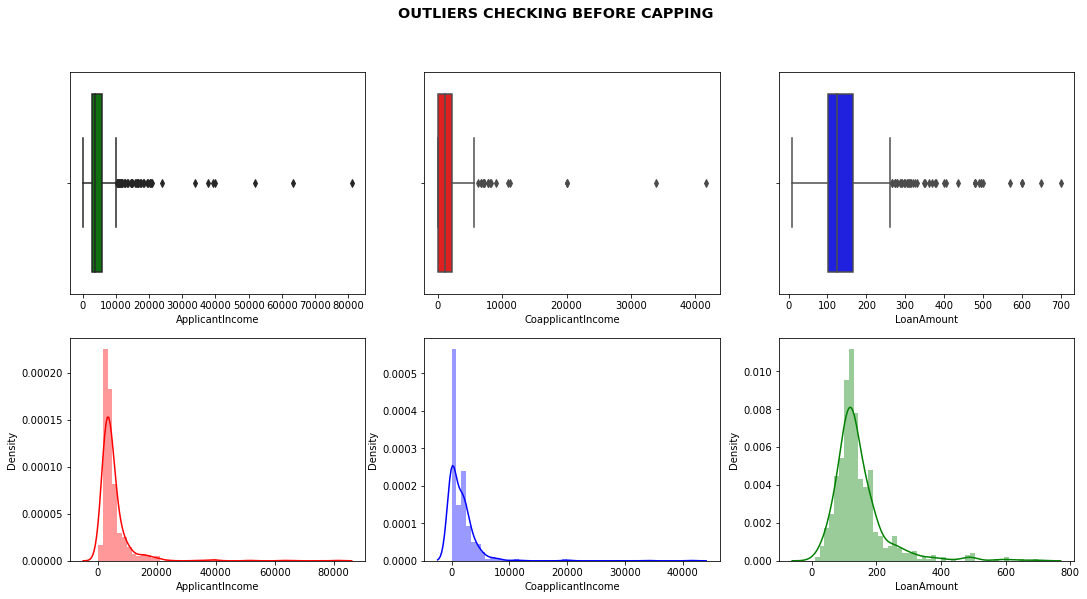

In [60]:
plt.figure(figsize = (18,9))

plt.suptitle("OUTLIERS CHECKING BEFORE CAPPING",fontsize ='x-large',weight='extra bold',ha = "center")
plt.subplot(2,3,1)
sns.boxplot(df1["ApplicantIncome"],color = "green")
plt.subplot(2,3,4)
sns.distplot(df1["ApplicantIncome"],color = "red")
plt.subplot(2,3,2)
sns.boxplot(df1["CoapplicantIncome"], color = "red")
plt.subplot(2,3,5)
sns.distplot(df1["CoapplicantIncome"], color = "blue")
plt.subplot(2,3,3)
sns.boxplot(df1["LoanAmount"],color = "blue")
plt.subplot(2,3,6)
sns.distplot(df1["LoanAmount"], color = 'green')
plt.show()

#    Outliers Capping Using Inter quartile Range Method


In [61]:
Q1 = df1["ApplicantIncome"].quantile(0.25)
Q3 = df1["ApplicantIncome"].quantile(0.75)
IQR = Q3-Q1
print(IQR)

2917.5


In [62]:
upperlimit = Q3+1.5*IQR

In [63]:
lowerlimit = Q1-1.5*IQR

In [64]:
df1["ApplicantIncome"] = np.where(df1["ApplicantIncome"]>upperlimit,upperlimit,
                         np.where(df1["ApplicantIncome"]<lowerlimit,lowerlimit,
                                 df1["ApplicantIncome"]))

In [65]:
Q11 = df1["CoapplicantIncome"].quantile(0.25)
Q33 = df1["CoapplicantIncome"].quantile(0.75)
IQR1 = Q33-Q11
print(IQR1)

2297.25


In [66]:
upperlimit1 = Q33+1.5*IQR1

In [67]:
lowerlimit1 = Q11-1.5*IQR1

In [68]:
df1["CoapplicantIncome"] = np.where(df1["CoapplicantIncome"]>upperlimit1,upperlimit1,
                           np.where(df1["CoapplicantIncome"]<lowerlimit1,lowerlimit1,
                                   df1["CoapplicantIncome"]))

In [69]:
Q111 = df1["LoanAmount"].quantile(0.25)
Q333 = df1["LoanAmount"].quantile(0.75)
IQR2 = Q333-Q111
print(IQR2)

64.5


In [70]:
upperlimit2 = Q333+1.5*IQR2

In [71]:
lowerlimit2 = Q111-1.5*IQR2

In [72]:
df1["LoanAmount"] = np.where(df1["LoanAmount"]>upperlimit2,upperlimit2,
                    np.where(df1["LoanAmount"]<lowerlimit2,lowerlimit2,
                            df1["LoanAmount"]))

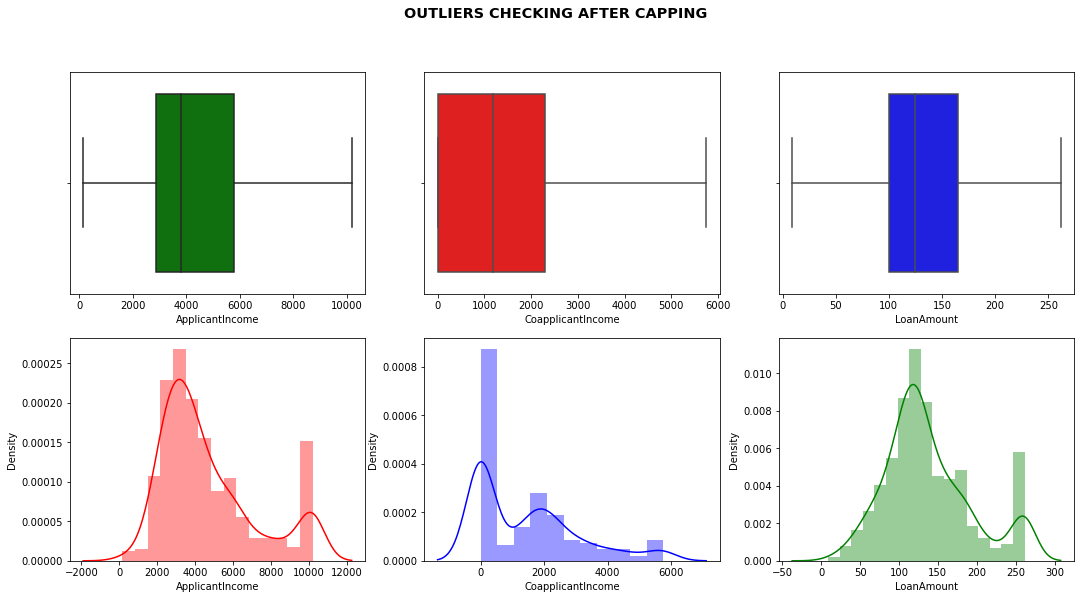

In [73]:
plt.figure(figsize = (18,9))
plt.suptitle("OUTLIERS CHECKING AFTER CAPPING",fontsize = 'x-large',weight = 'extra bold',ha = "center")
plt.subplot(2,3,1)
sns.boxplot(df1["ApplicantIncome"],color = "green")
plt.subplot(2,3,4)
sns.distplot(df1["ApplicantIncome"],color = "red")
plt.subplot(2,3,2)
sns.boxplot(df1["CoapplicantIncome"], color = "red")
plt.subplot(2,3,5)
sns.distplot(df1["CoapplicantIncome"], color = "blue")
plt.subplot(2,3,3)
sns.boxplot(df1["LoanAmount"], color = "blue")
plt.subplot(2,3,6)
sns.distplot(df1["LoanAmount"], color = 'green')
plt.show()

# dealing with outliers in categorical data

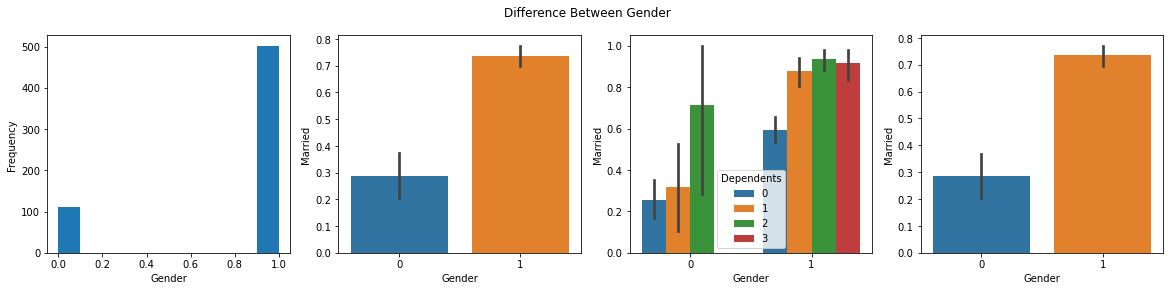

In [74]:
plt.figure(figsize=(20,4))
plt.suptitle("Difference Between Gender")
plt.subplot(1,4,1)
ax=df1["Gender"].plot.hist()
ax.set_ylabel("Frequency")
ax.set_xlabel("Gender")
plt.subplot(1,4,2)
sns.barplot(x = "Gender", y="Married",data = df1)
plt.subplot(1,4,3)
sns.barplot(x ="Gender", y="Married",data = df1,hue = "Dependents")
plt.subplot(1,4,4)
sns.barplot(x ="Gender", y="Married",data = df1)
plt.show()

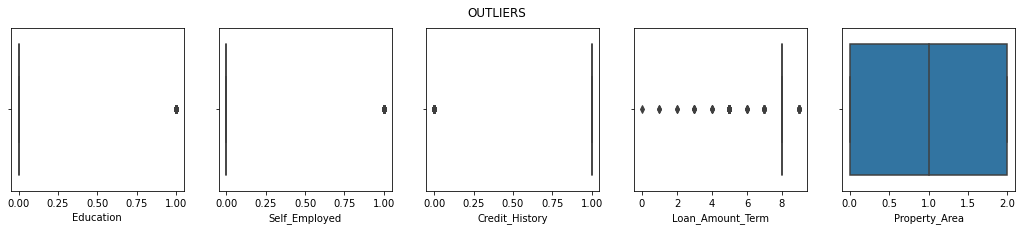

In [75]:
plt.figure(figsize = (18,3))
plt.suptitle("OUTLIERS")
plt.subplot(1,5,1)
sns.boxplot(df1["Education"])
plt.subplot(1,5,2)
sns.boxplot(df1["Self_Employed"])
plt.subplot(1,5,3)
sns.boxplot(df1["Credit_History"])
plt.subplot(1,5,4)
sns.boxplot(df1["Loan_Amount_Term"])
plt.subplot(1,5,5)
sns.boxplot(df1["Property_Area"])
plt.show()

..From the above plots it is conformed that categorical data also has outliers. The
reasons for being outliers in the categorical data such as fault collection of the
data or categories can be rare and hard to collect data about it.
The following are the ways to dealing with outliers in categorical data:
1) Retention : This process involves modelling the outliers with the other data.
2) Exclusion : This method involves techniques to exclude the outliers from the
data.
3) Replacement : Sometimes it happens that the data that is collected has
outlier values but as a category, they are similar to the other major categories.
In such cases, we can replace the outliers with similar categories. We can measure
the similarity between the data using the measures like euclidean distance, cosine
similarity, Manhattan distance etc.
4) Sampling : Outliers in the categorical data can also be said to the problem
of class imbalance. This means that the data for every class are not in a similar
proportion. In such a situation, we use some of the sampling techniques such as
downsampling, oversampling and SMOTE analysis. Here we mainly increase or decrease
the data points by knowing the importance of the categories in the modelling.
..Here I have choosen DownSampling Technique To Balance the Data

# Down-Sampling of Data based on "Gender" to make the data blanced

In [76]:
df2 = df1.loc[df1['Gender'] == 0]
df2.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,0,0,0,0,0,3510.0,0.0,76.0,8,0.0,2,0
29,0,0,2,0,0,3750.0,2083.0,120.0,8,1.0,1,1
37,0,1,0,0,0,3667.0,1459.0,144.0,8,1.0,1,1


In [77]:
df2.shape

(112, 12)

In [78]:
df3 = df1.loc[df1['Gender'] == 1]
df3.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,120.0,8,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,8,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,8,1.0,2,1


In [79]:
df3.shape

(502, 12)

In [80]:
df4 = df3.iloc[0:112, :]
df4.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,120.0,8,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,8,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,8,1.0,2,1


In [81]:
df4.shape

(112, 12)

In [82]:
df5 = pd.concat([df2,df4], axis = 0)
df5

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,0,0,0,0,0,3510.00,0.0,76.0,8,0.0,2,0
29,0,0,2,0,0,3750.00,2083.0,120.0,8,1.0,1,1
37,0,1,0,0,0,3667.00,1459.0,144.0,8,1.0,1,1
45,0,0,0,0,0,3410.00,0.0,88.0,8,1.0,2,1
48,0,1,0,0,0,2645.00,3440.0,120.0,8,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
129,1,1,0,0,0,6080.00,2569.0,182.0,8,1.0,0,0
130,1,0,0,0,1,10171.25,0.0,261.5,9,1.0,2,1
131,1,0,0,0,0,2014.00,1929.0,74.0,8,1.0,2,1
132,1,0,0,0,0,2718.00,0.0,70.0,8,1.0,1,1


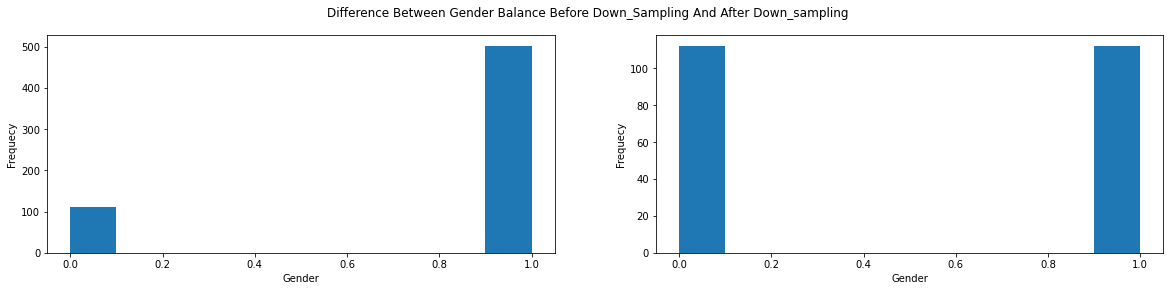

In [83]:
plt.figure(figsize = (20,4))
plt.suptitle("Difference Between Gender Balance Before Down_Sampling And After Down_sampling")
plt.subplot(1,2,1)
ax = df1["Gender"].plot.hist()
ax.set_ylabel("Frequecy")
ax.set_xlabel("Gender")
plt.subplot(1,2,2)
ax = df5["Gender"].plot.hist()
ax.set_ylabel("Frequecy")
ax.set_xlabel("Gender")
plt.show()

# Correlation Comparison of Balanced and Imbalanced Data

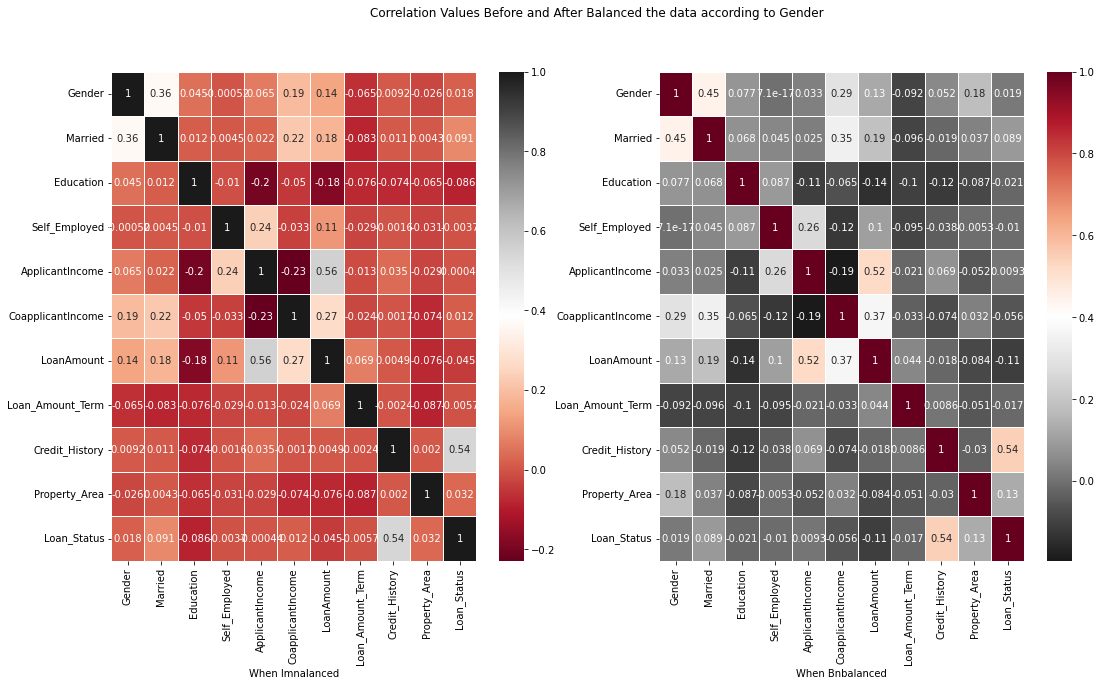

In [84]:
plt.figure(figsize = (18,9))
plt.suptitle("Correlation Values Before and After Balanced the data according to Gender")
plt.subplot(1,2,1)
corr = df1.corr()
ax = sns.heatmap(corr, cmap='RdGy', annot=True, linewidths= 1.0)
ax.set_xlabel("When Imnalanced")
plt.subplot(1,2,2)
corr = df5.corr()
ax = sns.heatmap(corr, cmap='RdGy_r', annot=True, linewidths= 1.0)
ax.set_xlabel("When Bnbalanced")
plt.show()

.From the above information it is clear that Correlation Values improved after
balanced the Data

# feature scaling

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scale = MinMaxScaler()

In [87]:
df5["ApplicantIncome"]=scale.fit_transform(np.array(df5["ApplicantIncome"]).reshape(-1,1))

In [88]:
df5["CoapplicantIncome"]=scale.fit_transform(np.array(df5["CoapplicantIncome"]).reshape(-1,1))

In [89]:
df5["LoanAmount"]=scale.fit_transform(np.array(df5["LoanAmount"]).reshape(-1,1))

In [90]:
df5["Loan_Amount_Term"]=scale.fit_transform(np.array(df5["Loan_Amount_Term"]).reshape(-1,1))

In [91]:
df5["Credit_History"]=scale.fit_transform(np.array(df5["Credit_History"]).reshape(-1,1))

In [92]:
df5["Property_Area"]=scale.fit_transform(np.array(df5["Property_Area"]).reshape(-1,1))

In [93]:
df5

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,0,0,0,0,0,0.331284,0.000000,0.265347,0.875,0.0,1.0,0
29,0,0,2,0,0,0.355377,0.362695,0.439604,0.875,1.0,0.5,1
37,0,1,0,0,0,0.347045,0.254043,0.534653,0.875,1.0,0.5,1
45,0,0,0,0,0,0.321245,0.000000,0.312871,0.875,1.0,1.0,1
48,0,1,0,0,0,0.244447,0.598977,0.439604,0.875,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
129,1,1,0,0,0,0.589283,0.447317,0.685149,0.875,1.0,0.0,0
130,1,0,0,0,1,1.000000,0.000000,1.000000,1.000,1.0,1.0,1
131,1,0,0,0,0,0.181102,0.335880,0.257426,0.875,1.0,1.0,1
132,1,0,0,0,0,0.251776,0.000000,0.241584,0.875,1.0,0.5,1


In [94]:
del df5["Dependents"]

In [95]:
df5

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,0,0,0,0,0.331284,0.000000,0.265347,0.875,0.0,1.0,0
29,0,0,0,0,0.355377,0.362695,0.439604,0.875,1.0,0.5,1
37,0,1,0,0,0.347045,0.254043,0.534653,0.875,1.0,0.5,1
45,0,0,0,0,0.321245,0.000000,0.312871,0.875,1.0,1.0,1
48,0,1,0,0,0.244447,0.598977,0.439604,0.875,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
129,1,1,0,0,0.589283,0.447317,0.685149,0.875,1.0,0.0,0
130,1,0,0,1,1.000000,0.000000,1.000000,1.000,1.0,1.0,1
131,1,0,0,0,0.181102,0.335880,0.257426,0.875,1.0,1.0,1
132,1,0,0,0,0.251776,0.000000,0.241584,0.875,1.0,0.5,1


# Train_Test_Split

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
features = df5.iloc[:,0:10]

In [98]:
x=features
y=df5["Loan_Status"]

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,train_size=0.70)

In [100]:
x_train.shape,y_train.shape

((156, 10), (156,))

In [101]:
x_test.shape,y_test.shape

((68, 10), (68,))

# Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state = 0)
model1.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [103]:
y_pred = model1.predict(x_test)

In [104]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1])

In [105]:
#making the confusion matrices 
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred)
cm1

array([[ 6, 10],
       [ 0, 52]], dtype=int64)

In [106]:
from sklearn.metrics import accuracy_score #accuracy score
ac1 = accuracy_score(y_test,y_pred)
ac1

0.8529411764705882

# K-Nearest Nighbor(KNN)

In [107]:
#import alogrithm methods from libraries
from sklearn.neighbors import KNeighborsClassifier

In [108]:
#creat a algorithm same as like a function
Model2 = KNeighborsClassifier(n_neighbors = 3)

In [109]:
#apply the model to the training data set
Model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [110]:
y_pred = Model2.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1])

In [111]:
#evaluation algorithms 
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,y_pred)
cm2

array([[ 4, 12],
       [ 5, 47]], dtype=int64)

In [112]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy for the model by validating y_pred and y_test
ac2 = accuracy_score(y_test, y_pred)
ac2

0.75

# Support Vector Machine(SVM)

In [113]:
#importing algorithm
from sklearn.svm import SVC
# Creating An alogrithm using imported method names
Model3 = SVC(kernel = 'poly')

In [114]:
#apply a algorithm to training data set
Model3.fit(x_train,y_train)

SVC(kernel='poly')

In [115]:
#predicting the test set result
y_pred = Model3.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1])

In [116]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test,y_pred)
cm3

array([[ 5, 11],
       [ 1, 51]], dtype=int64)

In [117]:
from sklearn.metrics import accuracy_score
ac3 = accuracy_score(y_test,y_pred)
ac3

0.8235294117647058

# Naive Bayes

In [118]:
from sklearn.naive_bayes import GaussianNB
Model4 = GaussianNB()
Model4.fit(x_train,y_train)

GaussianNB()

In [119]:
y_pred = Model4.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1])

In [120]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test,y_pred)
cm4

array([[ 5, 11],
       [ 2, 50]], dtype=int64)

In [121]:
from sklearn.metrics import accuracy_score
ac4 = accuracy_score(y_test,y_pred)
ac4

0.8088235294117647

# Decision Tree

In [122]:
# Fitting Decision Tree Classification to the Training set
# step 1 :import libraries and methods
from sklearn.tree import DecisionTreeClassifier
# step 2 : Create an alogrithm using imported methods
Model5 = DecisionTreeClassifier(criterion = 'entropy')
# Step3 : applying algorithm on training dataset ( Xtrain , ytrain)
Model5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [123]:
y_pred = Model5.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1])

In [124]:
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_pred)
cm5

array([[ 5, 11],
       [15, 37]], dtype=int64)

In [125]:
from sklearn.metrics import accuracy_score
ac5 = accuracy_score(y_test, y_pred)
ac5

0.6176470588235294

# Random Forest

In [126]:
# Fitting Random Forest Classification to the Training set
# 1 : Import required libraries and Method for RF
from sklearn.ensemble import RandomForestClassifier
# 2 : create an alogrithm using imported method name
Model6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
# Train the model - Training Data (xtrain, ytrain)
Model6.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [127]:
y_pred = Model6.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1])

In [128]:
from sklearn.metrics import confusion_matrix
cm6 = confusion_matrix(y_test, y_pred)
cm6

array([[ 6, 10],
       [ 4, 48]], dtype=int64)

In [129]:
from sklearn.metrics import accuracy_score
ac6 = accuracy_score(y_test,y_pred)
ac6

0.7941176470588235

In [130]:
print(Model6.feature_importances_)

[0.04819276 0.02138848 0.03101839 0.02537459 0.22674088 0.10196045
 0.18699127 0.04302406 0.20799794 0.10731118]


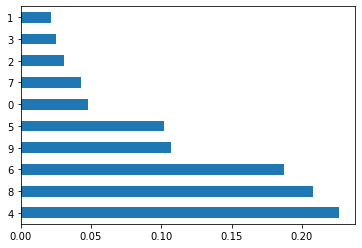

In [131]:
feat_importances = pd.Series(Model6.feature_importances_)
feat_importances.nlargest(10).plot(kind="barh")
plt.show()

In [132]:
from sklearn.metrics import accuracy_score
ac7 = accuracy_score(y_test,y_pred)
ac7

0.7941176470588235

# XG BOOST CLASSIFIER

In [133]:
from xgboost import XGBClassifier

In [134]:
Model7 = XGBClassifier()

In [135]:
Model7.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [136]:
y_pred = Model7.predict(x_test)

In [137]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1])

In [138]:
#making confusion matrix
from sklearn.metrics import accuracy_score
ac7 = accuracy_score(y_test,y_pred)
ac7

0.7941176470588235

# Accuracy Scores of ML Algorithms of BALANCED DATA

In [139]:
data = {"accuarcy_score":[ac1,ac2,ac3,ac4,ac5,ac6,ac7],}
scores1 = pd.DataFrame(data,index = ["LR","KNN","SVM","NB","DT","RF","XGB"])
scores1

,accuarcy_score
LR,0.852941
KNN,0.750000
SVM,0.823529
NB,0.808824
DT,0.617647
RF,0.794118
XGB,0.794118


# Machine Learning model with imblanced data

In [140]:
df6 = df1.copy()
df6

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,120.0,8,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,8,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,8,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,8,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,8,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.0,71.0,8,1.0,0,1
610,1,1,3,0,0,4106.0,0.0,40.0,5,1.0,0,1
611,1,1,1,0,0,8072.0,240.0,253.0,8,1.0,2,1
612,1,1,2,0,0,7583.0,0.0,187.0,8,1.0,2,1


# Feature scalling 

In [141]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
scale = MinMaxScaler()

In [143]:
df6["ApplicantIncome"] = scale.fit_transform(np.array(df6["ApplicantIncome"]).reshape(-1,1))

In [144]:
df6["CoapplicantIncome"] = scale.fit_transform(np.array(df6["CoapplicantIncome"]).reshape(-1,1))

In [145]:
df6["LoanAmount"] = scale.fit_transform(np.array(df6["LoanAmount"]).reshape(-1,1))

In [146]:
df6["Loan_Amount_Term"] = scale.fit_transform(np.array(df6["Loan_Amount_Term"]).reshape(-1,1))

In [147]:
df6["Dependents"] = scale.fit_transform(np.array(df6["Dependents"]).reshape(-1,1))

In [148]:
df6["Property_Area"] = scale.fit_transform(np.array(df6["Property_Area"]).reshape(-1,1))

In [149]:
df6

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.000000,0,0,0.568692,0.000000,0.439604,0.888889,1.0,1.0,1
1,1,1,0.333333,0,0,0.442360,0.262575,0.471287,0.888889,1.0,0.0,0
2,1,1,0.000000,0,1,0.284396,0.000000,0.225743,0.888889,1.0,1.0,1
3,1,1,0.000000,1,0,0.242784,0.410578,0.439604,0.888889,1.0,1.0,1
4,1,0,0.000000,0,0,0.583760,0.000000,0.522772,0.888889,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,0,0,0.274417,0.000000,0.245545,0.888889,1.0,0.0,1
610,1,1,1.000000,0,0,0.394761,0.000000,0.122772,0.555556,1.0,0.0,1
611,1,1,0.333333,0,0,0.790520,0.041789,0.966337,0.888889,1.0,1.0,1
612,1,1,0.666667,0,0,0.741724,0.000000,0.704950,0.888889,1.0,1.0,1


In [150]:
del df6["Dependents"]
df6

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0.568692,0.000000,0.439604,0.888889,1.0,1.0,1
1,1,1,0,0,0.442360,0.262575,0.471287,0.888889,1.0,0.0,0
2,1,1,0,1,0.284396,0.000000,0.225743,0.888889,1.0,1.0,1
3,1,1,1,0,0.242784,0.410578,0.439604,0.888889,1.0,1.0,1
4,1,0,0,0,0.583760,0.000000,0.522772,0.888889,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0.274417,0.000000,0.245545,0.888889,1.0,0.0,1
610,1,1,0,0,0.394761,0.000000,0.122772,0.555556,1.0,0.0,1
611,1,1,0,0,0.790520,0.041789,0.966337,0.888889,1.0,1.0,1
612,1,1,0,0,0.741724,0.000000,0.704950,0.888889,1.0,1.0,1


# Train_Test_split

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
features = df6.iloc[:,0:10]

In [153]:
x=features
y=df6["Loan_Status"]

In [154]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,train_size=0.70)

# Logistic Regression 

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
Model8 = LogisticRegression(random_state=0)
Model8.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [157]:
Model8

LogisticRegression(random_state=0)

In [158]:
y_pred = Model8.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [159]:
from sklearn.metrics import confusion_matrix
cm8 = confusion_matrix(y_test,y_pred)
cm8

array([[ 21,  30],
       [  2, 132]], dtype=int64)

In [160]:
from sklearn.metrics import accuracy_score
ac8 = accuracy_score(y_test,y_pred)
ac8

0.827027027027027

In [161]:
f1_positive1 = metrics.f1_score(y_test,y_pred,pos_label=1)
f1_positive1

0.8918918918918919

In [162]:
f1_negative1 = metrics.f1_score(y_test,y_pred,pos_label=0)
f1_negative1

0.5675675675675675

# K_Nearest_Neighbor (KNN)

In [163]:
from sklearn.neighbors import KNeighborsClassifier
Model9 = KNeighborsClassifier(n_neighbors = 3)
Model9.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [164]:
y_pred = Model9.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1])

In [165]:
from sklearn.metrics import confusion_matrix
cm9 = confusion_matrix(y_test,y_pred)
cm9

array([[ 26,  25],
       [ 24, 110]], dtype=int64)

In [166]:
from sklearn.metrics import accuracy_score
ac9 = accuracy_score(y_test,y_pred)
ac9

0.7351351351351352

In [167]:
f1_positive2 = metrics.f1_score(y_test,y_pred,pos_label=1)
f1_positive2

0.8178438661710037

In [168]:
f1_negative2 = metrics.f1_score(y_test,y_pred,pos_label=0)
f1_negative2

0.5148514851485149

# Support Vector Machine (SVM)

In [169]:
from sklearn.svm import SVC
Model10 = SVC(kernel = "poly")
Model10.fit(x_train,y_train)

SVC(kernel='poly')

In [170]:
y_pred = Model10.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [171]:
from sklearn.metrics import confusion_matrix
cm10 = confusion_matrix(y_test,y_pred)
cm10

array([[ 21,  30],
       [  2, 132]], dtype=int64)

In [172]:
from sklearn.metrics import accuracy_score
ac10 = accuracy_score(y_test,y_pred)
ac10

0.827027027027027

In [173]:
f1_positive3 = metrics.f1_score(y_test,y_pred,pos_label=1)
f1_positive3

0.8918918918918919

In [174]:
f1_negative3 = metrics.f1_score(y_test,y_pred,pos_label=0)
f1_negative3

0.5675675675675675

# Naive Bayes

In [175]:
from sklearn.naive_bayes import GaussianNB
Model11 = GaussianNB()
Model11.fit(x_train,y_train)

GaussianNB()

In [176]:
y_pred = Model11.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1])

In [177]:
from sklearn.metrics import confusion_matrix
cm11 = confusion_matrix(y_test,y_pred)
cm11

array([[ 21,  30],
       [  4, 130]], dtype=int64)

In [178]:
from sklearn.metrics import accuracy_score
ac11 = accuracy_score(y_test,y_pred)
ac11

0.8162162162162162

In [179]:
f1_positive4 = metrics.f1_score(y_test,y_pred,pos_label=1)
f1_positive4

0.8843537414965987

In [180]:
f1_negative4 = metrics.f1_score(y_test,y_pred,pos_label=0)
f1_negative4

0.5526315789473684

# Dession Tree

In [181]:
from sklearn.tree import DecisionTreeClassifier
Model12 = DecisionTreeClassifier(criterion = "entropy")
Model12.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [182]:
y_pred = Model12.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1])

In [183]:
from sklearn.metrics import confusion_matrix
cm12 = confusion_matrix(y_test,y_pred)
cm12

array([[ 29,  22],
       [ 21, 113]], dtype=int64)

In [184]:
from sklearn.metrics import accuracy_score
ac12 = accuracy_score(y_test,y_pred)
ac12

0.7675675675675676

In [185]:
f1_positive5 = metrics.f1_score(y_test,y_pred,pos_label=1)
f1_positive5

0.8401486988847584

In [186]:
f1_negative5 = metrics.f1_score(y_test,y_pred,pos_label=0)
f1_negative5

0.5742574257425743

# Random Forest

In [187]:
from sklearn.ensemble import RandomForestClassifier
Model13 = RandomForestClassifier(n_estimators = 10,criterion="entropy")
Model13.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [188]:
y_pred = Model13.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [189]:
from sklearn.metrics import confusion_matrix
cm13 = confusion_matrix(y_test,y_pred)
cm13

array([[ 25,  26],
       [ 16, 118]], dtype=int64)

In [190]:
from sklearn.metrics import accuracy_score
ac13 = accuracy_score(y_test,y_pred)
ac13

0.772972972972973

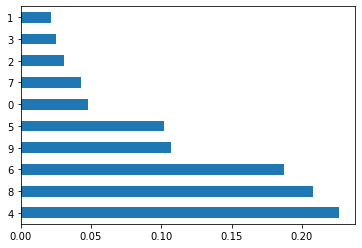

In [191]:
feat_importances_ = pd.Series(Model13.feature_importances_)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [192]:
f1_positive6 = metrics.f1_score(y_test,y_pred,pos_label=1)
f1_positive6

0.8489208633093526

In [193]:
f1_negative6 = metrics.f1_score(y_test,y_pred,pos_label=0)
f1_negative6

0.5434782608695652

# X_G_Boost

In [194]:
from xgboost import XGBClassifier
Model14 = XGBClassifier()
Model14.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [195]:
y_pred = Model14.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [196]:
from sklearn.metrics import confusion_matrix
cm14 = confusion_matrix(y_test,y_pred)
cm14

array([[ 29,  22],
       [ 16, 118]], dtype=int64)

In [197]:
from sklearn.metrics import accuracy_score
ac14 = accuracy_score(y_test,y_pred)
ac14

0.7945945945945946

In [198]:
f1_positive7 = metrics.f1_score(y_test,y_pred,pos_label=1)
f1_positive7

0.8613138686131387

In [199]:
f1_negative7 = metrics.f1_score(y_test,y_pred,pos_label=0)
f1_negative7

0.6041666666666666

__F1 Scores and Accuracy Scores of ML Algorithms of IMBALANCED DATA__

In [200]:
df={"Accuracy_score":[ac8,ac9,ac10,ac11,ac12,ac13,ac14],
   "F1_score_Positive":[f1_positive1,f1_positive2,f1_positive3,f1_positive4,f1_positive5,f1_positive6,f1_positive7],
   "F1_score_Nagative":[f1_negative1,f1_negative2,f1_negative3,f1_negative4,f1_negative5,f1_negative6,f1_negative7]}
score2 = pd.DataFrame(df,index=["LR","KNN","SVM","NB","DT","RF","XGB"])

In [201]:
score2

,Accuracy_score,F1_score_Positive,F1_score_Nagative
LR,0.827027,0.891892,0.567568
KNN,0.735135,0.817844,0.514851
SVM,0.827027,0.891892,0.567568
NB,0.816216,0.884354,0.552632
DT,0.767568,0.840149,0.574257
RF,0.772973,0.848921,0.543478
XGB,0.794595,0.861314,0.604167


__Displaying Classification Evaluation Metrics for Balanced and Imbalanced Data__

In [202]:
print("Balanced_Data:","/n",scores1,"/n","imblanced_Data:","/n",score2)

Balanced_Data: /n      accuarcy_score
LR         0.852941
KNN        0.750000
SVM        0.823529
NB         0.808824
DT         0.617647
RF         0.794118
XGB        0.794118 /n imblanced_Data: /n      Accuracy_score  F1_score_Positive  F1_score_Nagative
LR         0.827027           0.891892           0.567568
KNN        0.735135           0.817844           0.514851
SVM        0.827027           0.891892           0.567568
NB         0.816216           0.884354           0.552632
DT         0.767568           0.840149           0.574257
RF         0.772973           0.848921           0.543478
XGB        0.794595           0.861314           0.604167


__MODEL SELECTION BASED ON ACCURACY SCORE FOR BALANCED DATASET AND F1_SCORES FOR IMBALANCED DATASET__

In [203]:
testdata=pd.read_csv(r"C:\\DataSets\\train.csv")
testdata

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [204]:
testdata["Dependents"]=testdata["Dependents"].str.replace("+","")

In [205]:
del testdata["Loan_ID"]

In [206]:
del testdata["Dependents"]

In [207]:
testdata

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Filling Missing Categorical Values with mode()

In [208]:
testdata["Gender"].fillna(testdata.Gender.mode()[0],inplace=True)

In [209]:
testdata["Married"].fillna(testdata.Married.mode()[0],inplace=True)

In [210]:
testdata["Self_Employed"].fillna(testdata.Self_Employed.mode()[0],inplace=True)

In [211]:
testdata["Credit_History"].fillna(testdata.Credit_History.mode()[0],inplace=True)

In [212]:
testdata["LoanAmount"].fillna(testdata.LoanAmount.mode()[0],inplace=True)

In [213]:
testdata["Loan_Amount_Term"].fillna(testdata.Loan_Amount_Term.mode()[0],inplace=True)

In [214]:
testdata.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Applying Label Encoding On Categorical Features

In [215]:
from sklearn.preprocessing import LabelEncoder

In [216]:
encoder = LabelEncoder()

In [217]:
testdata["Gender"] = encoder.fit_transform(testdata["Gender"]) # Encoding "Gender" Column

In [218]:
print(testdata["Gender"].unique())

[1 0]


In [219]:
testdata["Married"] = encoder.fit_transform(testdata["Married"]) # Encoding "Married" Column

In [220]:
print(testdata["Married"].unique())

[0 1]


In [221]:
testdata["Education"] = encoder.fit_transform(testdata["Education"]) # Encoding "Education" Column

In [222]:
print(testdata["Education"].unique())

[0 1]


In [223]:
testdata["Self_Employed"] = encoder.fit_transform(testdata["Self_Employed"]) # Encoding "Self_Employed " Column

In [224]:
print(testdata["Education"].unique())

[0 1]


In [225]:
testdata["Loan_Amount_Term"] = encoder.fit_transform(testdata["Loan_Amount_Term"]) # Encoding "Loan_Amount_Term" Column

In [226]:
print(testdata["Loan_Amount_Term"].unique())

[8 4 6 5 2 7 9 1 3 0]


In [227]:
testdata["Property_Area"] = encoder.fit_transform(testdata["Property_Area"]) # Encoding "Property_Area" Column

In [228]:
print(testdata["Property_Area"].unique())

[2 0 1]


In [229]:
testdata.head(3)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,120.0,8,1.0,2,Y
1,1,1,0,0,4583,1508.0,128.0,8,1.0,0,N
2,1,1,0,1,3000,0.0,66.0,8,1.0,2,Y


# Feature Scalling

In [230]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [231]:
testdata["ApplicantIncome"] = scale.fit_transform(np.array(testdata["ApplicantIncome"]).reshape(-1,1))

In [232]:
testdata["CoapplicantIncome"] = scale.fit_transform(np.array(testdata["CoapplicantIncome"]).reshape(-1,1))

In [233]:
testdata["LoanAmount"] = scale.fit_transform(np.array(testdata["LoanAmount"]).reshape(-1,1))

In [234]:
testdata["Loan_Amount_Term"] = scale.fit_transform(np.array(testdata["Loan_Amount_Term"]).reshape(-1,1))

In [235]:
testdata["Property_Area"] = scale.fit_transform(np.array(testdata["Property_Area"]).reshape(-1,1))

In [236]:
testdata

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0.070489,0.000000,0.160637,0.888889,1.0,1.0,Y
1,1,1,0,0,0.054830,0.036192,0.172214,0.888889,1.0,0.0,N
2,1,1,0,1,0.035250,0.000000,0.082489,0.888889,1.0,1.0,Y
3,1,1,1,0,0.030093,0.056592,0.160637,0.888889,1.0,1.0,Y
4,1,0,0,0,0.072356,0.000000,0.191027,0.888889,1.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0.034014,0.000000,0.089725,0.888889,1.0,0.0,Y
610,1,1,0,0,0.048930,0.000000,0.044863,0.555556,1.0,0.0,Y
611,1,1,0,0,0.097984,0.005760,0.353111,0.888889,1.0,1.0,Y
612,1,1,0,0,0.091936,0.000000,0.257598,0.888889,1.0,1.0,Y


# Applying Logistic Regression model on test dataset

In [237]:
l = testdata.iloc[:,:10]
l

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0.070489,0.000000,0.160637,0.888889,1.0,1.0
1,1,1,0,0,0.054830,0.036192,0.172214,0.888889,1.0,0.0
2,1,1,0,1,0.035250,0.000000,0.082489,0.888889,1.0,1.0
3,1,1,1,0,0.030093,0.056592,0.160637,0.888889,1.0,1.0
4,1,0,0,0,0.072356,0.000000,0.191027,0.888889,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0.034014,0.000000,0.089725,0.888889,1.0,0.0
610,1,1,0,0,0.048930,0.000000,0.044863,0.555556,1.0,0.0
611,1,1,0,0,0.097984,0.005760,0.353111,0.888889,1.0,1.0
612,1,1,0,0,0.091936,0.000000,0.257598,0.888889,1.0,1.0


In [238]:
s = testdata.iloc[:,10:]
s

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [239]:
testdata_pred1 = model1.predict(l)
testdata_pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [240]:
testdata_pred2 = pd.DataFrame(testdata)

In [241]:
testdata_pred3 = Model8.predict(l)

In [242]:
testdata_pred3

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [243]:
testdata_pred4 = pd.DataFrame(testdata_pred3)

In [244]:
testdata_pred4

,0
0,1
1,1
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1
